# Preparation

In [95]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [96]:
import imblearn
print(imblearn.__version__)

0.8.0


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
#ROC curve, sensitivity, specificity
#xgboost


# Preprocessing

In [98]:
df = pd.read_csv('mdata3.csv')

In [99]:
# X variable for prediction new copy
X = df.drop('mbreast_cancer', axis = 1).copy()
X.head()

,pipe,cigar,asp,ibup,asppd,ibuppd,hyperten_f,hearta_f,stroke_f,emphys_f,...,weight20_f,weight50_f,height_f,bmi_20c,bmi_50c,colon_comorbidity,liver_comorbidity,fh_cancer,age,agelevel
0,0,0,1,0,4,0,1,0,0,0,...,200,220,73,3,3,0,0,1,67,2
1,2,2,0,0,0,0,1,0,0,0,...,160,200,71,2,3,0,0,1,62,1
2,0,0,1,0,2,0,1,0,0,0,...,220,230,71,4,4,0,0,1,62,1
3,2,0,1,1,6,6,0,0,0,0,...,120,154,67,2,2,0,0,0,57,0
4,0,0,1,1,2,1,1,1,0,0,...,185,195,70,3,3,0,0,1,56,0


In [100]:
y = df['mbreast_cancer'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mbreast_cancer, dtype: int64

In [101]:
#One-Hot Encoding
X_encoded = pd.get_dummies(X, columns= ['pipe',	'cigar',	'asp',	'ibup',	'asppd',	'ibuppd',	'hyperten_f',	'hearta_f',	'stroke_f',	'emphys_f',	'bronchit_f',	'diabetes_f',	'polyps_f',	'arthrit_f',	'osteopor_f',	'divertic_f',	'gallblad_f',	'race7',	'hispanic_f',	'enlpros_f',	'infpros_f',	'prosprob_f',	'urinate_f',	'vasect_f',	'smoked_f', 'cigpd_f',	'cig_stat', 'bmi_curc', 'bmi_20c',	'bmi_50c',	'colon_comorbidity',	'liver_comorbidity',	'fh_cancer', 'agelevel'])
X_encoded.head()

,cig_years,pack_years,bmi_20,bmi_50,bmi_curr,weight_f,weight20_f,weight50_f,height_f,age,...,colon_comorbidity_0,colon_comorbidity_1,liver_comorbidity_0,liver_comorbidity_1,fh_cancer_0,fh_cancer_1,agelevel_0,agelevel_1,agelevel_2,agelevel_3
0,0.0,0.0,26.383937,29.022331,25.724339,195,200,220,73,67,...,1,0,1,0,0,1,0,0,1,0
1,8.0,24.0,22.313033,27.891291,25.659988,184,160,200,71,62,...,1,0,1,0,0,1,0,1,0,0
2,35.0,35.0,30.680421,32.074985,34.585201,248,220,230,71,62,...,1,0,1,0,0,1,0,1,0,0
3,11.0,33.0,18.792604,24.117175,23.490755,150,120,154,67,57,...,1,0,1,0,1,0,1,0,0,0
4,0.0,0.0,26.541837,27.976531,31.993673,223,185,195,70,56,...,1,0,1,0,0,1,1,0,0,0


# Feature selection

In [102]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr().abs()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

<Figure size 864x720 with 0 Axes>

In [103]:
#Correlation with output variable
cor_target = abs(cor["mbreast_cancer"])

In [104]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(mb, 3))

Top Absolute Correlations


TypeError: corr() missing 1 required positional argument: 'other'

In [ ]:
mb=df[df.columns[:]].corr()['mbreast_cancer'][:]

In [ ]:
# sunstack = cor.unstack()
so = mb.sort_values(ascending=False, kind="quicksort")

In [ ]:
print(so.head)

In [ ]:
ct = cor_target.values
ct.argsort()

In [ ]:

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

# Spliting and Scaling
At this point we know that there's no feature's correlation that is larger than 0.5 for the variable mbreast_cancer in the original data frame.


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
#X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

# Stantardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



AttributeError: 'numpy.ndarray' object has no attribute 'describe'

# Preliminary Classificaiton Tree

In [106]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({0: 41013, 1: 18})
After SMOTE :  Counter({0: 41013, 1: 41013})


In [116]:
clf_dt = DecisionTreeClassifier(random_state=42 )
clf_dt = clf_dt.fit(X_train_smote, y_train_smote)
#clf = classifier

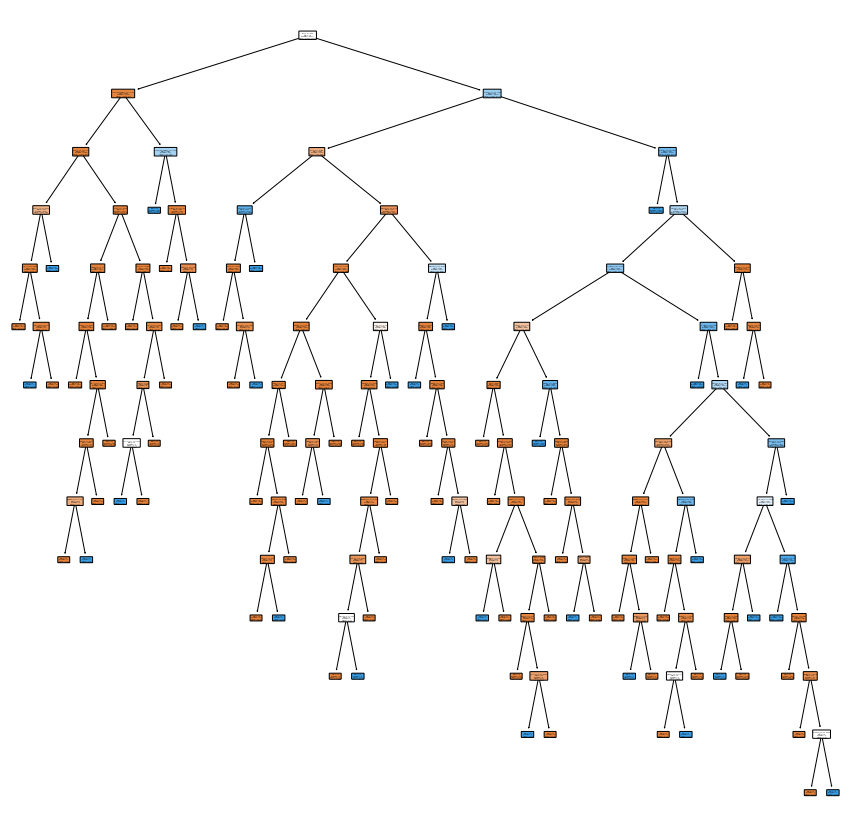

In [108]:
#DRAW the DECISION TREE 
plt.figure(figsize=(15, 15)) # default unit is inch
plot_tree(
    clf_dt,
    filled = True,
    rounded = True,
    class_names = ["No MBC", "Yes MBC"],
    feature_names= X_encoded.columns
);

Testing Accuracy =  0.9985376910141113


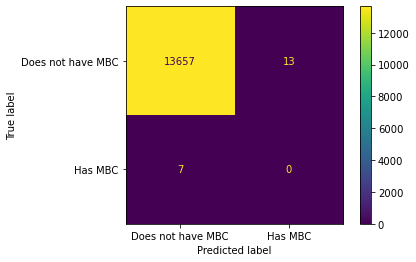

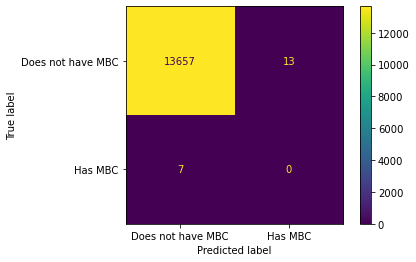

In [109]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have MBC", "Has MBC"])

from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clf_dt,
                      X_test,
                      y_test,
                      display_labels=["Does not have MBC", "Has MBC"])
cm = confusion_matrix(y_test, clf_dt.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print('Testing Accuracy = ', (TP + TN)/(TP + TN + FN + FP))

# 0.9985

In [119]:
tree_preds= clf_dt.predict(X_test)

In [121]:
treeROC = round(roc_auc_score(y_test, tree_preds),10)


In [122]:
print(treeROC)
#0.4995245062 # 0.9985

0.4995245062


## Pruning

In [133]:
path = clf_dt.cost_complexity_pruning_path(X_train_smote, y_train_smote)
ccp_alphas = path.ccp_alphas # extract different values for alphas
ccp_alphas = ccp_alphas[:-1] # exclude maximum value
clf_dts = []

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train_smote, y_train_smote)
  clf_dts.append(clf_dt)

In [ ]:
#Drawing graph
train_scores = [clf_dt.score(X_train_smote, y_train_smote) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]
# Select the highest accuracy of alpha, in this case, 0.032
flg, ax = plt.subplots() #unpack this tuple into the variables fig and ax
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle = 'steps-post')
ax.legend()#Automatic detection of elements to be shown in the legend
plt.show()

Alpha: 0.032

In [ ]:
#Lets try 5 fold cross validation and see what will happen

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.032)
scores = cross_val_score(clf_dt, X_train_smote, y_train_smote, cv=5)
df = pd.DataFrame(data={'tree':range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')


In [ ]:
# Looking for the optimal alpha value

alpha_loop_values=[]
#Run each alpha value for 5-fold cross validation
#then store mean and standard deviation of the scores (accuracy) to cross_val_score
#in alpha_loop_values
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt, X_train_smote, y_train_smote, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
# draw a graph for them
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_plot = alpha_results.plot(
    x='alpha',
    y='mean_accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
   
)


In [ ]:
# ideal_ccp_alpha = 1.4E-5
# 0.999488191854939 with 1.4E+5
# 0.9992688455070556 with 1.4E-5
# 0.999488191854939 with 1.4

In [ ]:
# #Build again
# clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
# clf_dt_pruned = clf_dt_pruned.fit(X_train_smote, y_train_smote)

In [ ]:
# from sklearn.metrics import confusion_matrix
# plot_confusion_matrix(clf_dt_pruned,
#                       X_test,
#                       y_test,
#                       display_labels=["Does not have MBC", "Has MBC"])
# cm = confusion_matrix(y_test, clf_dt_pruned.predict(X_test))
# TP = cm[0][0]
# TN = cm[1][1]
# FN = cm[1][0]
# FP = cm[0][1]
# print('Testing Accuracy = ', (TP + TN)/(TP + TN + FN + FP))

In [ ]:
# plt.figure(figsize=(15,15))
# plot_tree(clf_dt_pruned,
#           filled=True,
#           rounded=True,
#           class_names=["No MBC", "Yes MBC"],
#           feature_names=X_encoded.columns);

# Random Forest

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=42, class_weight='balanced').fit(X_train_smote,y_train_smote)

In [135]:
clf_preds=pd.DataFrame(clf.predict(X_test))
clf_pred_probs=pd.DataFrame(clf.predict_proba(X_test)[:,0])
#clf_preds
clf_pred_probs


,0
0,0.660452
1,0.760134
2,0.682660
3,0.706170
4,0.549358
...,...
13672,0.740256
13673,0.658098
13674,0.602902
13675,0.818394


In [136]:
clf_preds.describe()

,0
count,13677.000000
mean,0.163559
std,0.369889
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
confusion_matrix(y_test,clf_preds)

In [ ]:
accuracy_score(y_test,clf_preds)
#0.8394384733494187

In [ ]:
roc_auc_score(y_test,clf_preds)
# AUC (Area Under The Curve)
# ROC (Receiver Operating Characteristics) 
# AUROC (Area Under the Receiver Operating Characteristics)
# 0.6341101473508204

the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

AUC is useful when the dataset is skewed like mine

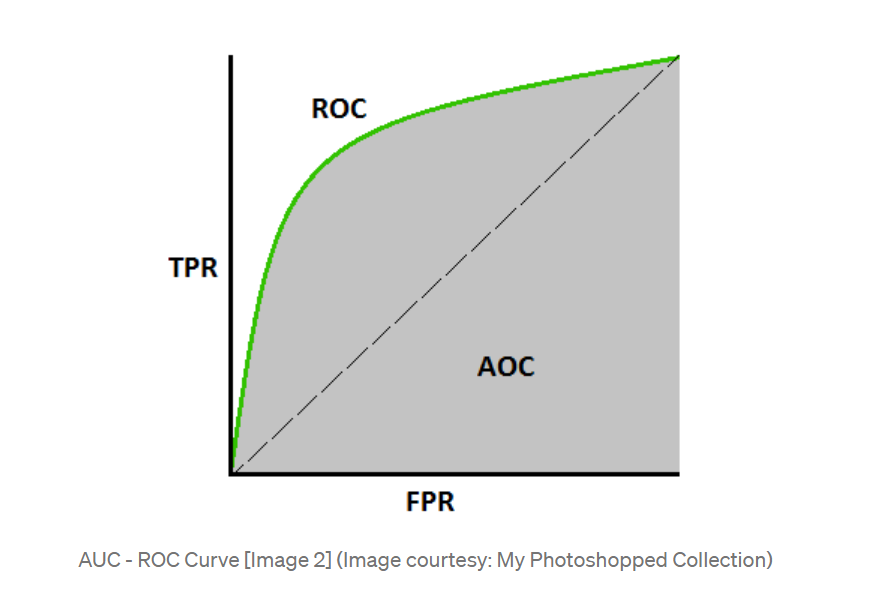

Understanding AUC-ROC:
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.title("Confusion Matrix for Classification")
plt.show()  

# PCA

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.

https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db

PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables, PCA does not work well to reduce data. Refer to the correlation matrix to determine. In general, if most of the correlation coefficients are smaller than 0.3, PCA will not help.

https://www.originlab.com/doc/Origin-Help/PrincipleComp-Analysis


In [ ]:
# find n components to explain variance.
# Code source: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_train)
pca = PCA().fit(data_rescaled)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,12)

fig, ax = plt.subplots()
xi = np.arange(1, 117, step=1)
# The number is to match y
y = np.cumsum(pca.explained_variance_ratio_) 
# (explained_variance_ratio_)
# Percentage of variance explained by each of the selected components.
# np.cumsum
# Return the cumulative sum of the elements along a given axis.


plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 117, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# 43 number of components.

In [142]:
X_train.shape

(41031, 116)

In [143]:
from sklearn.decomposition import PCA
pca = PCA(.95) #n_component
pca.fit(X_train_smote)
pca.n_components_
# pca = PCA(n_components=43, random_state=42).fit_transform(X_train)
# 43 components according to the graph, but it only allows 1.
# pca = pd.DataFrame(pca,columns=['pca'])
#pca
#X_train= pd.concat([X_train,pca],axis=1)
# pca.shape

58

In [144]:
X_train_smote = pca.transform(X_train_smote)
X_test = pca.transform(X_test)


In [145]:
X_test.shape

(13677, 58)

# XGboost
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [146]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
xgb= XGBClassifier()

In [147]:
xgb.fit(X_train_smote, y_train_smote)

F:\anaconda\conda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:

xb_preds=pd.DataFrame(xgb.predict(X_test))

In [149]:
print(xb_preds)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
13672  0
13673  0
13674  0
13675  0
13676  0

[13677 rows x 1 columns]


In [ ]:
xbACC = round(accuracy_score(y_test,xb_preds),4)
#0.9995
xbROC = round(roc_auc_score(y_test,xb_preds),10)
#0.5

In [ ]:
xb_preds.describe()

In [ ]:
y_test.describe()

In [ ]:
print(xbACC)
print(xbROC)

# Logistic Regression

About LBFGS:
https://en.wikipedia.org/wiki/Limited-memory_BFGS
(iteration reached limit, can't use it)

In [174]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
# Changed default solver to increase the speed
lg = logisticRegr.fit(X_train_smote, y_train_smote)
print(logisticRegr.predict(X_test))


[0 0 0 ... 0 0 0]


In [125]:
log_preds = logisticRegr.predict(X_test)

In [127]:
score = round(roc_auc_score(y_test, log_preds), 2)
print(score)
# 0.67

0.67


In [128]:
logACC = round(accuracy_score(y_test, log_preds), 2)

In [129]:
print(logACC)

0.9


## Plot AUC

In [177]:
tn, fp, fn, tp = confusion_matrix(y_test, log_preds).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 3
False Positives: 1309
True Negatives: 12361
False Negatives: 4


In [175]:
probas = lg.predict_proba(X_test)[:, 1]

In [176]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [198]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

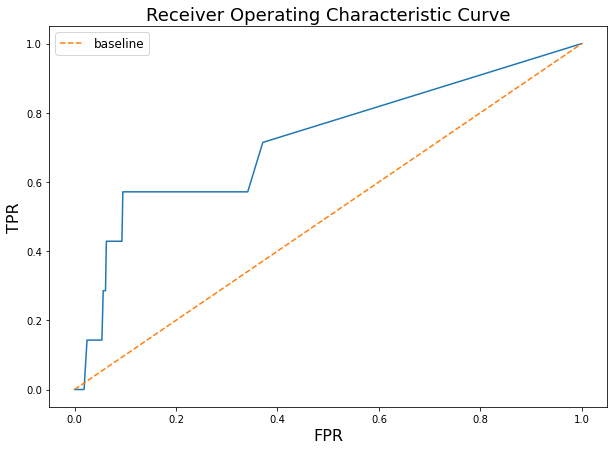

In [201]:
plt.figure
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
#ax.plot(tpr, fpr)

ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

In [202]:
roc_auc_score(y_test, log_preds)

0.6664071480823492

# Isolation Forest

Isolation Forests are used for outlier and anomaly detection.

n_estimators: The number of trees to use. 

max_samples: The number of samples to draw while build a single tree.

bootstrap: If True, individual trees are fit on random subsets of the training data sampled with replacement. If False, sampling without replacement is performed

max_features: The number of features to draw from X to train each base estimator.


More details:
https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest



In [150]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
ISFOR_clus = IsolationForest(n_estimators=1000,max_samples='auto',bootstrap=True,max_features=5, random_state=rng).fit(X_train_smote)
# default is 100
ISFOR_clus_preds=pd.DataFrame(ISFOR_clus.predict(X_test))
print(ISFOR_clus_preds)
ISFOR_clus_preds=ISFOR_clus_preds.replace(1, 0).replace(-1,1)
# switch them into binary.
print(ISFOR_clus_preds)

       0
0      1
1      1
2      1
3      1
4      1
...   ..
13672  1
13673  1
13674  1
13675  1
13676  1

[13677 rows x 1 columns]
       0
0      0
1      0
2      0
3      0
4      0
...   ..
13672  0
13673  0
13674  0
13675  0
13676  0

[13677 rows x 1 columns]


AttributeError: 'IsolationForest' object has no attribute 'predict_proba'

# Spectral clustering

It seems that I can't run this on my machine due to its large occupation of memory. (even 12.5 GB wouldn't be enough)

In [ ]:
# There should be an optimal cluster number if you use k-means to evaluate
from sklearn.cluster import SpectralClustering
rng = np.random.RandomState(42)
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# 
SP_clus = SpectralClustering(random_state=rng) # n_clusters=8, n_init=10,default value
SP_clus_preds=pd.DataFrame(SP_clus.fit_predict(X_test))

# One Class SVM

In [151]:
# Outlier detection
rng = np.random.RandomState(42)
from sklearn.svm import OneClassSVM
SVM_clus = OneClassSVM(gamma='auto').fit(X_train_smote)
# auto = 1 / n_features, the radius for outlier tolerance.
#SVM_clus.predict(X_train)

#SVM_clus.score_samples(X_train)-
SVM_clus_preds=pd.DataFrame(SVM_clus.fit_predict(X_test))
SVM_clus_preds=SVM_clus_preds.replace(1, 0).replace(-1,1)

In [152]:
SVM_clus_preds

,0
0,0
1,0
2,1
3,0
4,0
...,...
13672,1
13673,1
13674,0
13675,1


# K-means

In [153]:
from sklearn.cluster import KMeans
KMEANS_clus = KMeans(n_clusters=2, n_init=1000, max_iter=1000,random_state=rng).fit(X_train_smote)
KMEANS_clus.labels_
KMEANS_clus_preds=pd.DataFrame(KMEANS_clus.fit_predict(X_test))
KMEANS_clus_preds

,0
0,1
1,0
2,1
3,0
4,1
...,...
13672,0
13673,0
13674,0
13675,0



# Local Outlier Factor
The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. 

In [154]:
from sklearn.neighbors import LocalOutlierFactor
LOCOUT_clus = LocalOutlierFactor(n_neighbors=10).fit(X_train_smote)
LOCOUT_clus_preds=pd.DataFrame(LOCOUT_clus.fit_predict(X_test))
LOCOUT_clus_preds=LOCOUT_clus_preds.replace(1, 0).replace(-1,1)
LOCOUT_clus_preds.value_counts()

0    13532
1      145
dtype: int64

# DBScan
Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density

In [155]:
from sklearn.cluster import DBSCAN
DBSC_clus = DBSCAN(eps=3, min_samples=10).fit(X_train_smote)
DBSC_clus_preds=pd.DataFrame(DBSC_clus.fit_predict(X_test))
DBSC_clus_preds=DBSC_clus_preds.replace(1, 0).replace(-1,1)

In [168]:
DBSC_clus_preds.value_counts()
LOCOUT_clus_preds.value_counts()

0    13532
1      145
dtype: int64

# Cluster Score

In [157]:
finals_preds= pd.concat([clf_preds,clf_pred_probs,ISFOR_clus_preds,SVM_clus_preds,KMEANS_clus_preds,LOCOUT_clus_preds, DBSC_clus_preds],axis=1)
finals_preds.columns=['clf_class','clf_score', 'ISOFOR','SVM-1C','KMEANS','LOCOUT','DBSCAN']
finals_preds

,clf_class,clf_score,ISOFOR,SVM-1C,KMEANS,LOCOUT,DBSCAN
0,0,0.660452,0,0,1,1,1
1,0,0.760134,0,0,0,0,1
2,0,0.682660,0,1,1,0,1
3,0,0.706170,0,0,0,0,1
4,0,0.549358,0,0,1,0,0
...,...,...,...,...,...,...,...
13672,0,0.740256,0,1,0,0,1
13673,0,0.658098,0,1,0,0,1
13674,0,0.602902,0,0,0,0,1
13675,0,0.818394,0,1,0,0,1


In [158]:
def cluster_scores(cls):
    ACC,ROC=[round(accuracy_score(finals_preds['clf_class'],finals_preds[cls]),2) , 
       round(roc_auc_score(finals_preds['clf_class'],finals_preds[cls]),2)]
    # round to 2 decimals
    return print(cls, ': Acc=',ACC, '&', 'ROC=',ROC)

In [159]:
# add a column for all the scrores
finals_preds['ENSEMB']= finals_preds[['ISOFOR','SVM-1C','KMEANS','LOCOUT']].mode(axis=1)[0]
finals_preds

,clf_class,clf_score,ISOFOR,SVM-1C,KMEANS,LOCOUT,DBSCAN,ENSEMB
0,0,0.660452,0,0,1,1,1,0.0
1,0,0.760134,0,0,0,0,1,0.0
2,0,0.682660,0,1,1,0,1,0.0
3,0,0.706170,0,0,0,0,1,0.0
4,0,0.549358,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...
13672,0,0.740256,0,1,0,0,1,0.0
13673,0,0.658098,0,1,0,0,1,0.0
13674,0,0.602902,0,0,0,0,1,0.0
13675,0,0.818394,0,1,0,0,1,0.0


In [160]:
# Use cluster_scores method to see each model's accuracy
print(cluster_scores('ISOFOR'),
      cluster_scores('LOCOUT'),
      cluster_scores('SVM-1C'),
      cluster_scores('DBSCAN'),
      cluster_scores('KMEANS'),
      cluster_scores('ENSEMB'))

# ISOFOR : Acc= 0.84 & ROC= 0.45
# LOCOUT : Acc= 0.94 & ROC= 0.5
# SVM-1C : Acc= 0.48 & ROC= 0.38
# DBSCAN : Acc= 0.06 & ROC= 0.5
# KMEANS : Acc= 0.63 & ROC= 0.56
# ENSEMB : Acc= 0.92 & ROC= 0.49
# XGBOOST : ACC = 0.995 & ROC = 0.5
# DECISION : ACC = 0.9985 & ROC = 0.4995245062
# LOGISTIC : ACC = 0.9 & ROC = 0.67

ISOFOR : Acc= 0.74 & ROC= 0.46
LOCOUT : Acc= 0.83 & ROC= 0.5
SVM-1C : Acc= 0.44 & ROC= 0.39
DBSCAN : Acc= 0.15 & ROC= 0.49
KMEANS : Acc= 0.66 & ROC= 0.62
ENSEMB : Acc= 0.81 & ROC= 0.49
None None None None None None


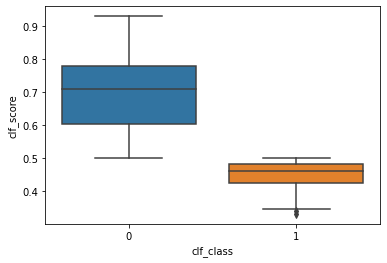

In [161]:
import seaborn as sn
sn.boxplot(x="clf_class",y="clf_score",data=finals_preds);

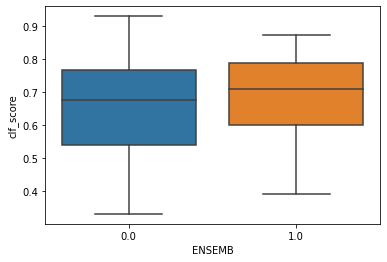

In [162]:
sn.boxplot(x="ENSEMB",y="clf_score",data=finals_preds);

In [ ]:
sn.boxplot(x="ENSEMB",y="clf_score",data=finals_preds);

In [ ]:
sn.boxplot(x="ENSEMB",y="clf_score",data=finals_preds);

In [ ]:
finals_preds.describe()

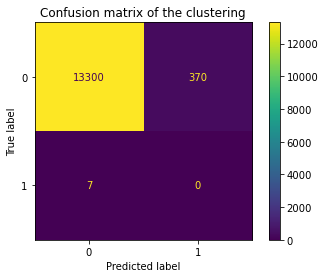

In [171]:
cm = confusion_matrix(y_test,finals_preds['ENSEMB'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix of the clustering');

# ROAUC Plot

In [181]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
tn, fp, fn, tp = confusion_matrix(y_test, finals_preds['ENSEMB']).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 0
False Positives: 370
True Negatives: 13300
False Negatives: 7
